## 前處理

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/碩一下/Machine Learning/Homework_1/train.csv",index_col="id")
test_data = pd.read_csv("/content/drive/MyDrive/碩一下/Machine Learning/Homework_1/test.csv",index_col="id")

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 897
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bone_length    371 non-null    float64
 1   rotting_flesh  371 non-null    float64
 2   hair_length    371 non-null    float64
 3   has_soul       371 non-null    float64
 4   color          371 non-null    object 
 5   type           371 non-null    object 
dtypes: float64(4), object(2)
memory usage: 20.3+ KB


In [ ]:
train_data.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392
std,0.132833,0.146358,0.169902,0.176129
min,0.061032,0.095687,0.134600,0.009402
25%,0.340006,0.414812,0.407428,0.348002
50%,0.434891,0.501552,0.538642,0.466372
75%,0.517223,0.603977,0.647244,0.600610
max,0.817001,0.932466,1.000000,0.935721


In [ ]:
#看看各種type的顏色分佈
pd.crosstab(train_data["type"],train_data["color"])

color,black,blood,blue,clear,green,white
type,,,,,,
Ghost,14,6,6,32,15,44
Ghoul,14,4,6,42,13,50
Goblin,13,2,7,46,14,43


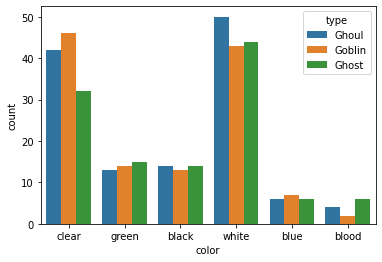

In [ ]:
sns.countplot(x='color', hue='type', data=train_data)

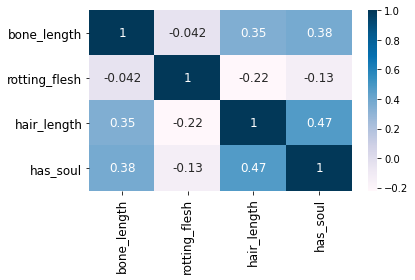

In [ ]:
# 看看各變項間和type的相關
plt.tick_params(labelsize=12)
corr = train_data[["bone_length","rotting_flesh","hair_length","has_soul","color","type"]].corr()
sns.heatmap(corr,cmap="PuBu",annot=True,annot_kws={"size":12})
plt.tight_layout()

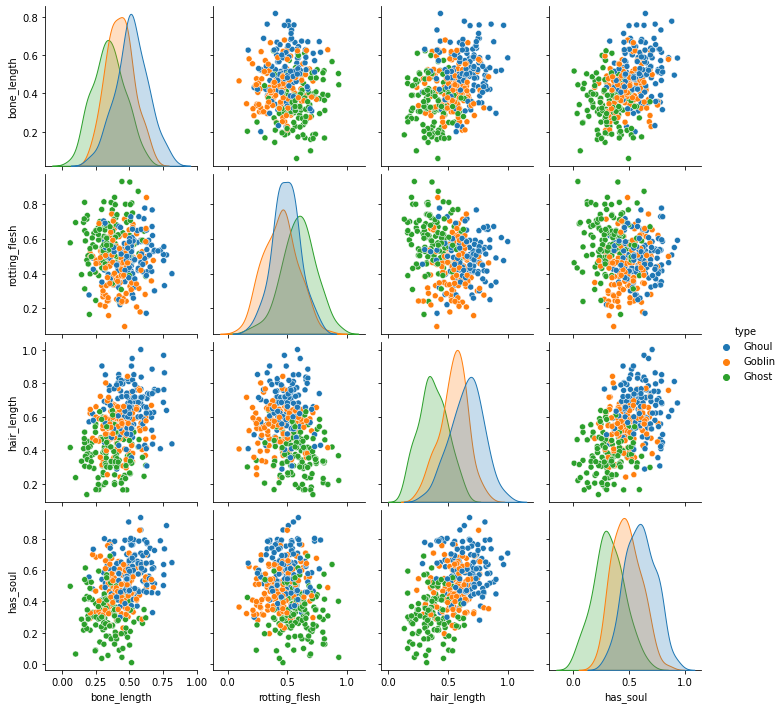

In [ ]:
#看看不同type各變項間的分布
sns.pairplot(train_data.drop('color', axis = 1), hue = 'type')

In [ ]:
#切分 X 和 Y
X = train_data.iloc[:,:-1]
Y = train_data.iloc[:,-1]

#train data <color> =>dummy onehot encoding
X = pd.get_dummies(X,drop_first=True)

In [ ]:
# spilt data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=13)

In [ ]:
#處理test_data
test_data = pd.get_dummies(test_data,drop_first=True)

## 建立模型與預測



### decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)

parameters = {'max_leaf_nodes': list(range(1, 16)), 
              'min_samples_split': np.linspace(.1, 1,10, endpoint=True),
              "max_features":[1,4,6],
              'max_depth':np.linspace(1, 16, 16, endpoint=True)}

grid_search = GridSearchCV(estimator = tree, param_grid = parameters,
                           scoring = "accuracy", n_jobs = -1,verbose=2,cv=5)

grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("best score : " + str(best_accuracy))
print("best parameters : " + str(best_parameters))


Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 4168 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 10664 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 19720 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 31400 tasks      | elapsed:  1.8min


best score : 0.7181749622926094
best parameters : {'max_depth': 5.0, 'max_features': 6, 'max_leaf_nodes': 8, 'min_samples_split': 0.1}


[Parallel(n_jobs=-1)]: Done 36000 out of 36000 | elapsed:  2.1min finished


In [ ]:
tree_best = DecisionTreeClassifier(max_depth=5,max_features=6,max_leaf_nodes=8, min_samples_split=0.1,random_state = 0)

### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 0)

parameters = {"n_estimators" : [512, 1024, 2048],
              "min_samples_leaf": [2,3,4,5],
              "min_samples_split" : [2,3,4,5],
              "max_depth" : [2, 4, 8, 16]}
grid_search = GridSearchCV(estimator = forest, param_grid = parameters,
                           scoring = "accuracy", n_jobs = -1,verbose=2,cv=5)
grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("best score : " + str(best_accuracy))
print("best parameters : " + str(best_parameters))

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 24.3min finished


best score : 0.7533182503770739
best parameters : {'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 512}


In [ ]:
forest_best = RandomForestClassifier(random_state = 0,max_depth=16, min_samples_leaf=4, min_samples_split=2,n_estimators=512)

### XGboost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0)

parameters = {"n_estimators" : [216, 512, 1024, 2048],
              "learning_rate": [0.01,0.1,0.5],
              "max_depth" : [2, 4, 8, 16]}
                    
grid_search = GridSearchCV(estimator = xgb, param_grid = parameters,
                           scoring = "accuracy", n_jobs = -1,verbose = 2,cv = 5)

grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("best score : " + str(best_accuracy))
print("best parameters : " + str(best_parameters))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.3min finished


best score : 0.745475113122172
best parameters : {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 1024}


In [ ]:
xgb_best = XGBClassifier(random_state=0,learning_rate=0.5, max_depth=4, n_estimators=1024)

### light GBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=0)
parameters = {"n_estimators" : [216, 512, 1024, 2048],
              'learning_rate': [0.01,0.1,0.5],
              "max_depth": [5,10,50,100]}

grid_search = GridSearchCV(estimator = lgbm, param_grid = parameters,
                           scoring = "accuracy", n_jobs = -1, verbose=1, cv=5)
grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("best score : " + str(best_accuracy))
print("best parameters : " + str(best_parameters))


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   57.3s


best score : 0.73763197586727
best parameters : {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 216}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.1min finished


In [ ]:
lgbm_best = LGBMClassifier(random_state=0,learning_rate=0.01,max_depth=10,n_estimators=216)

### Adaboost 



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=0)
parameters = {"n_estimators" : [216, 512, 1024, 2048],
              "learning_rate": [0.01,0.1,0.5]}

grid_search = GridSearchCV(estimator = ada, param_grid = parameters,
                           scoring = "accuracy", n_jobs = -1, verbose=1, cv=5)
grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("best score : " + str(best_accuracy))
print("best parameters : " + str(best_parameters))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.5min finished


best score : 0.6987179487179487
best parameters : {'learning_rate': 0.5, 'n_estimators': 216}


In [ ]:
ada_best = AdaBoostClassifier(random_state=0,learning_rate=0.5,n_estimators=216)

### Extra Tree

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extra = ExtraTreesClassifier(random_state=0)

parameters = {"n_estimators" : [216, 512, 1024, 2048],
              "max_depth" : [2, 4, 8, 16]}

grid_search = GridSearchCV(estimator = extra, param_grid = parameters,
                           scoring = "accuracy", n_jobs = -1, verbose=1, cv=5)
grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("best score : " + str(best_accuracy))
print("best parameters : " + str(best_parameters))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   36.9s


best score : 0.7416289592760181
best parameters : {'max_depth': 2, 'n_estimators': 216}


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.2min finished


In [ ]:
extra_best = ExtraTreesClassifier(random_state=0,max_depth= 2, n_estimators=216)

### 預測

In [ ]:
#投票分類器～投票決定答案

voting_clf = VotingClassifier(estimators=[('df', tree_best), ('rf', forest_best), ('xgb', xgb_best), ('lgbm', lgbm_best), ('ada', ada_best),('extra',extra_best)]
                              , voting='hard')
voting_clf.fit(X_train, Y_train)
y_pred = voting_clf.predict(test_data)
print("\nAccuracy Score for VotingClassifier is: " + str(voting_clf.score(X_train, Y_train)))


Accuracy Score for VotingClassifier is: 0.9073359073359073


In [ ]:
submission = pd.DataFrame({'id':test_data.index, 'type':y_pred})
submission.to_csv('/content/drive/MyDrive/碩一下/Machine Learning/Homework_1/ans.csv', index=False)

### 上傳分數

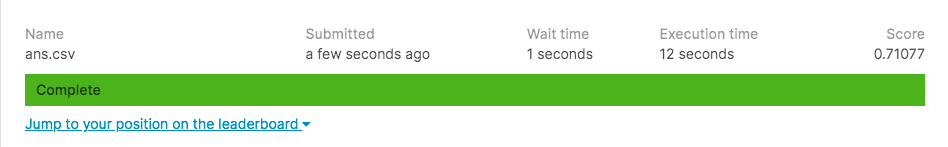